# 程序性能检测及优化
## 目标  
在图像处理中你每秒钟都要做大量的运算，所以你的程序不仅要能给出正
确的结果，同时还必须要快。所以这节我们将要学习：
- 检测程序的效率
- 一些能够提高程序效率的技巧
- 你要学到的函数有： cv2.getTickCount,cv2.getTickFrequency等  
除了 OpenCV， Python 也提供了一个叫 time 的的模块，你可以用它来测量
程序的运行时间。另外一个叫做 profile 的模块会帮你得到一份关于你的程序
的详细报告，其中包含了代码中每个函数运行需要的时间，以及每个函数被调
用的次数。如果你正在使用 IPython 的话，所有这些特点都被以一种用户友好
的方式整合在一起了。我们会学习几个重要的，要想学到更加详细的知识就打
开更多资源中的链接吧。

## 7.1 使用 OpenCV 检测程序效率

cv2.getTickCount 函数返回从参考点到这个函数被执行的时钟数。所以当你在一个函数执行前后都调用它的话，你就会得到这个函数的执行时间时钟数）。  
 cv2.getTickFrequency 返回时钟频率，或者说每秒钟的时钟数。所以你可以按照下面的方式得到一个函数运行了多少秒：

In [1]:
import cv2
import numpy as np
e1 = cv2.getTickCount()
# your code execution
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()

我们将会用下面的例子演示。下面的例子是用窗口大小不同（ 5， 7， 9）的
核函数来做中值滤波

0.3298555


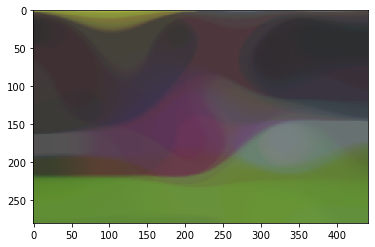

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot  as plt
img1 = cv2.imread('roi.png',1) # 彩色图像
e1 = cv2.getTickCount()
for i in range(5,49,2):
    img1 = cv2.medianBlur(img1,i) # median filtering 中值滤波
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print(t)
imageRGB = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

<table><tr><td bgcolor= rgb(50, 205, 50)>
    <p algin=left>注 意：你也可以中time模块实现上面的功能。但是要用的函数是time.time()而不是 cv2.getTickCount。比较一下这两个结果的差别
    吧。</p></td><tr><table>

## 7.2 OpenCV 中的默认优化
OpenCV 中的很多函数都被优化过（使用 SSE2， AVX 等）。也包含一些
没有被优化的代码。如果我们的系统支持优化的话要尽量利用这一点。在编译时
优化是被默认开启的。因此 OpenCV 运行的就是优化后的代码，如果你把优化
关闭的话就只能执行低效的代码了。你可以使用函数 cv2.useOptimized()
来查看优化是否被开启了，使用函数 cv2.setUseOptimized() 来开启优化。
让我们来看一个简单的例子吧。

In [18]:
import cv2
import numpy as np

# check if optimization is enabled
print(cv2.useOptimized())
%timeit res = cv2.medianBlur(img1,49)

False
433 ns ± 8.74 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [20]:
# Disable it
cv2.setUseOptimized(True)
print(cv2.useOptimized())
%timeit res = cv2.medianBlur(img1,49)

True
425 ns ± 5.48 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


看见了吗，优化后中值滤波的速度是原来的两倍。如果你查看源代码的话，
你会发现中值滤波是被 SIMD 优化的。所以你可以在代码的开始处开启优化
（你要记住优化是默认开启的）。

## 7.3 在 IPython 中检测程序效率
有时你需要比较两个相似操作的效率，这时你可以使用 IPython 为你提供
的魔法命令%time。他会让代码运行好几次从而得到一个准确的（运行）时
间。它也可以被用来测试单行代码的。  
例如，你知道下面这同一个数学运算用哪种行式的代码会执行的更快吗？  
x = 5; y = x∗∗2  
x = 5; y = x∗x  
x = np:uint([5]); y = x∗x  
y = np:squre(x)  
我们可以在 IPython 的 Shell 中使用魔法命令找到答案。

In [21]:
import cv2
import numpy as np

x = 5
%timeit y=x**2
%timeit y=x*x
z = np.uint8([5])
%timeit y=z*z
%timeit y=np.square(z)

306 ns ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
49.1 ns ± 0.506 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
508 ns ± 3.41 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
500 ns ± 3.99 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


竟然是第一种写法，它居然比 Nump 快了 20 倍。如果考虑到数组构建的
话，能达到 100 倍的差。

<table><tr><td bgcolor=green><p algin=left>注意： Python 的标量计算比 Nump 的标量计算要快。对于仅包含一两个元素的操作 Python 标量比 Numpy 的数组要快。但是当数组稍微大一点时
Numpy 就会胜出了。</p></td></tr></table>

我们来再看几个例子。我们来比较一下 cv2.countNonZero() 和np.count_nonzero()。

In [23]:
import cv2
import numpy as np
%timeit z = cv2.countNonZero(img1)
%timeit z = np.count_nonzero(img1)

419 ns ± 6.43 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.24 µs ± 26.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


看见了吧， OpenCV 的函数是 Numpy 函数的 25 倍。  
<table><tr><td bgcolor=green><p algin=left>注意：一般情况下 OpenCV 的函数要比 Numpy 函数快。所以对于相同的操作最好使用 OpenCV 的函数。当然也有例外，尤其是当使用 Numpy 对视图
（而非复制）进行操作时。</p></td></tr></table>


## 8.4 更多 IPython 的魔法命令
还有几个魔法命令可以用来检测程序的效率， profiling， line profiling，
内存使用等。他们都有完善的文档。所以这里只提供了超链接。感兴趣的可以
自己学习一下。  
## 8.5 效率优化技术
有些技术和编程方法可以让我们最大的发挥 Python 和 Numpy 的威力。
我们这里仅仅提一下相关的，你可以通过超链接查找更多详细信息。我们要说
的最重要的一点是：首先用简单的方式实现你的算法（结果正确最重要），当结
果正确后，再使用上面的提到的方法找到程序的瓶颈来优化它。  
1. 尽量避免使用循环，尤其双层三层循环，它们天生就是非常慢的。
2. 算法中尽量使用向量操作，因为 Numpy 和 OpenCV 都对向量操作进行了优化。
3. 利用高速缓存一致性。
4. 没有必要的话就不要复制数组。使用视图来代替复制。数组复制是非常浪费资源的。就算进行了上述优化，如果你的程序还是很慢，或者说大的训话不可避免的话，你应该尝试使用其他的包，比如说 Cython，来加速你的程序。


更多资源
1. [Python Optimization Techniques](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)
2. [Scipy Lecture Notes - Advanced Numpy](http://scipy-lectures.github.io/advanced/advanced_numpy/index.html#advanced-numpy)
3. [Timing and Profiling in IPython](https://pynash.org/2013/03/06/timing-and-profiling.html)